<a href="https://colab.research.google.com/github/T4690/Rock-paper-scissors/blob/main/Rock%2Cpaper%2Cscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q tensorflow tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
tfds.disable_progress_bar()

In [ ]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [ ]:
builder = tfds.builder("rock_paper_scissors")
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [ ]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


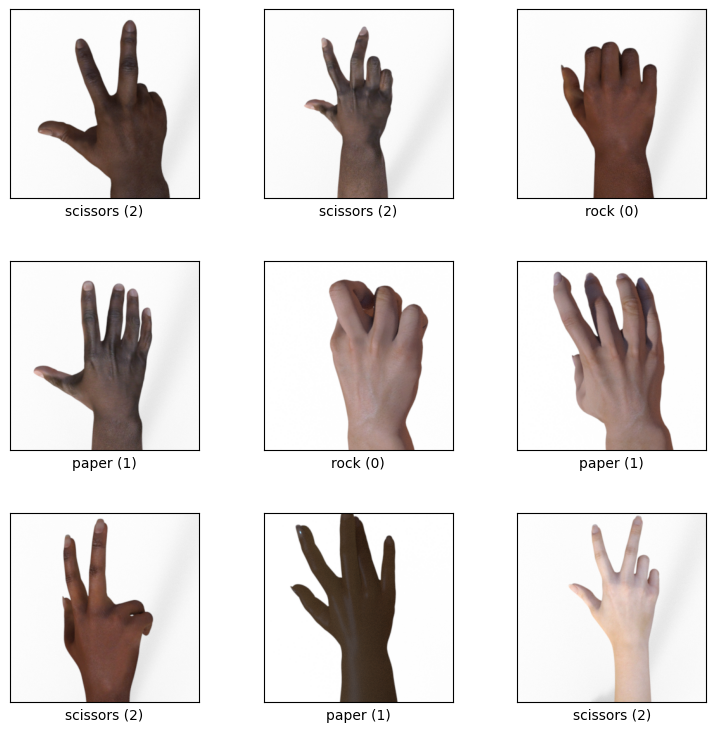

In [ ]:
fig = tfds.show_examples( ds_train,info)

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])


In [ ]:
#train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)


train_images = train_images.astype('float32')
test_images =test_images.astype('float32')

train_images /= 255
train_images /= 255


In [ ]:
train_images[0].shape

(300, 300)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation ='relu'),
    keras.layers.Dense(256, activation ='relu'),
    keras.layers.Dense(3,activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4119 - loss: 1.0729
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6507 - loss: 0.7824
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8092 - loss: 0.5083
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8501 - loss: 0.4169
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8772 - loss: 0.3399


In [ ]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6135 - loss: 54408.6484


[58764.7109375, 0.5940860509872437]

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)



Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3234 - loss: 1.0997
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3325 - loss: 1.0986
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3380 - loss: 1.0986
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3370 - loss: 1.0987
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3309 - loss: 1.0987


In [ ]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3250 - loss: 3464.7546


[3391.90478515625, 0.3333333432674408]

In [ ]:
pip install -U keras-tuner

In [ ]:
# Import RandomSearch after installing the package
from kerastuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow import keras
import numpy as np

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers",min_value=0,max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters",[16,32,64]),3,activation='relu'))

  model.add(keras.layers.Conv2D(64,3,activation='relu'))
  model.add(keras.layers.Conv2D(32,3,activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer",[64,128,256,512,1024]),activation='relu'))

  model.add(keras.layers.Dense(3,activation='softmax'))

  model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
      build_model,
      objective='val_accuracy',
      max_trials=3
)

# Add these lines to check if the variables are defined
print(f"Type of train_images: {type(train_images)}")
print(f"Shape of train_images: {train_images.shape}")
print(f"Type of train_labels: {type(train_labels)}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Type of test_images: {type(test_images)}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Type of test_labels: {type(test_labels)}")
print(f"Shape of test_labels: {test_labels.shape}")

tuner.search(train_images, train_labels,validation_data=(test_images, test_labels),epochs=10,batch_size=32)

Reloading Tuner from ./untitled_project/tuner0.json
Type of train_images: <class 'numpy.ndarray'>
Shape of train_images: (2520, 300, 300)
Type of train_labels: <class 'numpy.ndarray'>
Shape of train_labels: (2520,)
Type of test_images: <class 'numpy.ndarray'>
Shape of test_images: (372, 300, 300, 1)
Type of test_labels: <class 'numpy.ndarray'>
Shape of test_labels: (372,)


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3250 - loss: 3.4166


[3.380526542663574, 0.3333333432674408]

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 99, 99, 1)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 97, 97, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 95, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 93, 93, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 91, 91, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 89, 89, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    31,719,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,768,019 (121.19 MB)

 Trainable params: 31,768,019 (121.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 512
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 32
Score: 0.3333333432674408

Trial 04 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 256
layer_0_filters: 16
layer_1_filters: 64
layer_2_filters: 64
Score: 0.3333333432674408

Trial 00 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filters: 16
layer_1_filters: 16
Score: 0.3333333432674408

Trial 01 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 16
Score: 0.3333333432674408

Trial 03 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 64
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 32
Score: 0.3333333432674408


In [ ]:
best_model.save('./my_model.keras')

In [ ]:
loaded_model = tf.keras.models.load_model('./my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3250 - loss: 3.4166


[3.380526542663574, 0.3333333432674408]

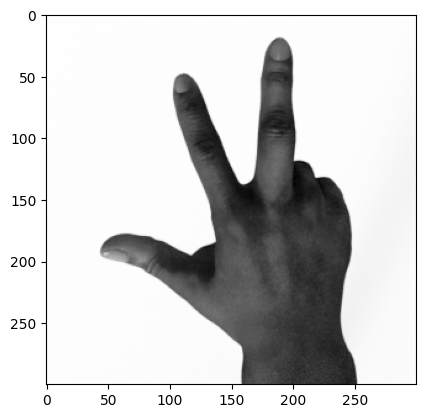

In [ ]:
rgb_images= np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]
rgb_image.shape

image = train_images[0].reshape(300,300)

plt.imshow(train_images[0],cmap='Greys_r')

plt.show()

<ipython-input-8-8dc120825bc3>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Boston_-Massachusetts_State_House_%2848718911666%29.jpg/330px-Boston_-Massachusetts_State_House_%2848718911666%29.jpg')


<class 'numpy.ndarray'>


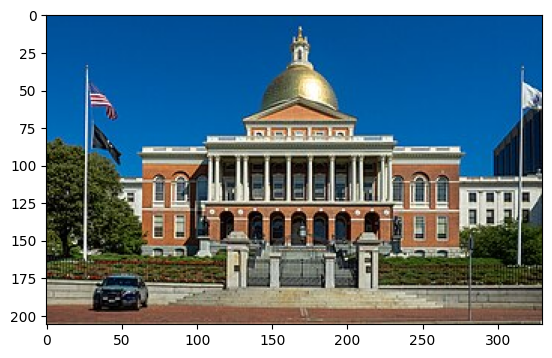

In [ ]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Boston_-Massachusetts_State_House_%2848718911666%29.jpg/330px-Boston_-Massachusetts_State_House_%2848718911666%29.jpg')

plt.imshow(im)

print(type(im))





In [ ]:
import random

def play_game():
    user_choice = input("Choose rock, paper, or scissors: ").lower()
    computer_choice = random.choice(['rock', 'paper', 'scissors'])
    print(f"Computer chose: {computer_choice}")

    if user_choice == computer_choice:
        print("It's a tie!")
    elif (user_choice == 'rock' and computer_choice == 'scissors') or \
         (user_choice == 'paper' and computer_choice == 'rock') or \
         (user_choice == 'scissors' and computer_choice == 'paper'):
        print("You win!")
    else:
        print("Computer wins!")

play_game()

Choose rock, paper, or scissors: 3
Computer chose: rock
Computer wins!
